## Introduction

- Quelle: Kaggle, Introduction to machine learning, https://www.kaggle.com/code/dansbecker/how-models-work
- Data: Based on California Housing Data https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

Wir beginnen mit einem Überblick darüber, wie maschinelle Lernmodelle funktionieren und wie sie verwendet werden. Dies mag einfach erscheinen, wenn du bereits Erfahrung mit statistischer Modellierung oder maschinellem Lernen hast. Keine Sorge, wir werden bald zu leistungsstarken Modellen übergehen.

In diesem Kurs wirst du Modelle aufbauen, während du folgendem Szenario folgst:

Dein Cousin hat Millionen von Dollar durch Spekulationen im Immobilienbereich verdient. Er hat dir angeboten, Geschäftspartner zu werden, weil du dich für Data Science interessierst. Er stellt das Geld zur Verfügung, und du lieferst Modelle, die vorhersagen, wie viel verschiedene Häuser wert sind.

Du fragst deinen Cousin, wie er den Immobilienwert in der Vergangenheit vorhergesagt hat, und er sagt, dass er nur auf seine Intuition vertraut hat. Doch bei weiterem Nachfragen stellt sich heraus, dass er Preismuster von Häusern, die er in der Vergangenheit gesehen hat, identifiziert hat, und diese Muster nutzt er, um Vorhersagen für neue Häuser zu treffen, die er in Betracht zieht.

Maschinelles Lernen funktioniert auf die gleiche Weise. Wir beginnen mit einem Modell namens Entscheidungsbaum. Es gibt ausgeklügeltere Modelle, die genauere Vorhersagen liefern. Aber Entscheidungsbäume sind einfach zu verstehen und bilden die Grundlage für einige der besten Modelle in der Datenwissenschaft.

Zur Vereinfachung beginnen wir mit dem einfachsten möglichen Entscheidungsbaum.

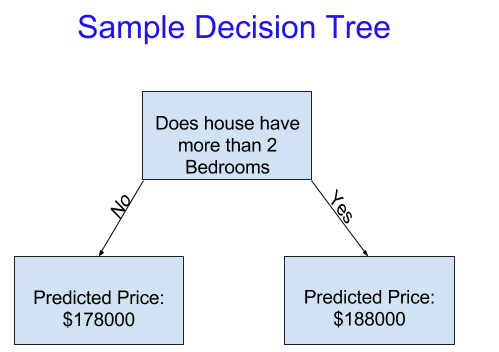

Es teilt Häuser nur in zwei Kategorien auf. Der vorhergesagte Preis für jedes Haus, das in Betracht gezogen wird, ist der historische Durchschnittspreis von Häusern in derselben Kategorie.

Wir verwenden Daten, um zu entscheiden, wie die Häuser in zwei Gruppen aufgeteilt werden, und dann erneut, um den vorhergesagten Preis in jeder Gruppe zu bestimmen. Dieser Schritt, bei dem Muster aus den Daten erfasst werden, wird als Anpassung oder Training des Modells bezeichnet. Die Daten, die verwendet werden, um das Modell anzupassen, werden als Trainingsdaten bezeichnet.

Die Details, wie das Modell angepasst wird (z. B. wie die Daten aufgeteilt werden), sind so komplex, dass wir sie später behandeln werden. Nachdem das Modell angepasst wurde, kannst du es auf neue Daten anwenden, um die Preise weiterer Häuser vorherzusagen.

## Verbesserung des Entscheidungsbaums

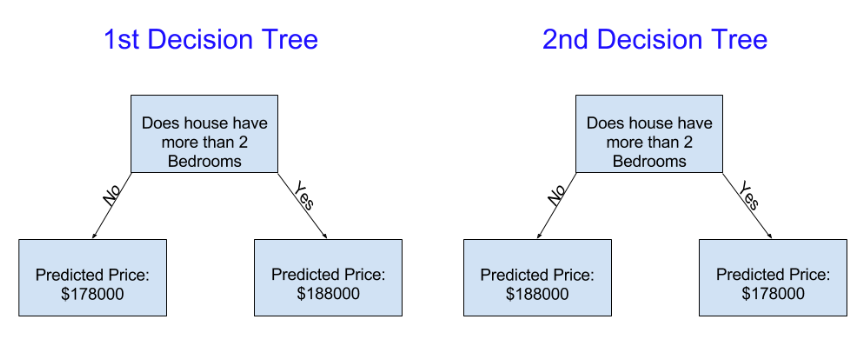

Der Entscheidungsbaum auf der linken Seite (Entscheidungsbaum 1) ergibt wahrscheinlich mehr Sinn, da er die Realität erfasst, dass Häuser mit mehr Schlafzimmern tendenziell zu höheren Preisen verkauft werden als Häuser mit weniger Schlafzimmern. Der größte Nachteil dieses Modells ist, dass es die meisten Faktoren, die den Immobilienpreis beeinflussen, wie die Anzahl der Badezimmer, die Grundstücksgröße, die Lage usw., nicht berücksichtigt.

Du kannst mehr Faktoren erfassen, indem du einen Baum verwendest, der mehr "Aufteilungen" enthält. Diese werden als "tiefere" Bäume bezeichnet. Ein Entscheidungsbaum, der auch die Gesamtgröße des Grundstücks jedes Hauses berücksichtigt, könnte so aussehen:

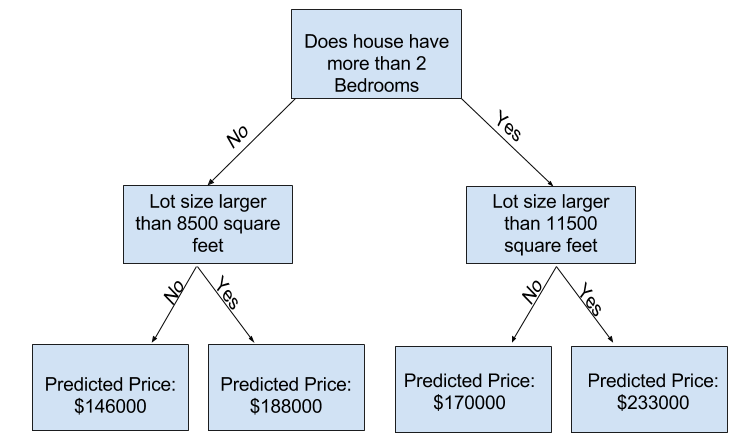

Sie prognostizieren den Preis eines Hauses, indem Sie den Entscheidungsbaum verfolgen und dabei stets den Pfad wählen, der den Eigenschaften des Hauses entspricht. Der prognostizierte Preis für das Haus befindet sich am unteren Ende des Baums. Der Punkt am unteren Ende, an dem wir eine Vorhersage treffen, wird als Blatt bezeichnet.

Die Aufteilungen und Werte an den Blättern werden durch die Daten bestimmt. Überprüfen Sie daher die Daten, mit denen Sie arbeiten werden.

## Pandas nutzen, um sich mit Ihren Daten vertraut zu machen¶
Der erste Schritt in jedem Machine-Learning-Projekt besteht darin, sich mit den Daten vertraut zu machen. Dazu nutzen Sie die Pandas-Bibliothek. Pandas ist das wichtigste Tool für Datenwissenschaftler zur Untersuchung und Bearbeitung von Daten. Die meisten kürzen Pandas im Code als pd ab. Wir tun dies mit dem Befehl

In [ ]:
import pandas as pd

Der wichtigste Bestandteil der Pandas-Bibliothek ist der DataFrame. Ein DataFrame enthält Daten, die man sich als Tabelle vorstellen kann. Er ähnelt einem Tabellenblatt in Excel oder einer Tabelle in einer SQL-Datenbank.

Pandas bietet leistungsstarke Methoden für die meisten Aufgaben, die Sie mit dieser Art von Daten erledigen möchten.

Als Beispiel betrachten wir Daten zu Immobilienpreisen in Melbourne, Australien. In den praktischen Übungen wenden Sie dieselben Prozesse auf einen neuen Datensatz an, der Immobilienpreise in Iowa enthält.

Die Beispieldaten (Melbourne) befinden sich im Dateipfad ../input/melbourne-housing-snapshot/melb_data.csv.

Wir laden und untersuchen die Daten mit den folgenden Befehlen:

In [3]:
california_file_path = 'cali_data.csv'
# read the data and store data in DataFrame titled melbourne_data
california_data = pd.read_csv(california_file_path) 
# print a summary of the data in Melbourne data
california_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Interpreting Data Description¶
The results show 8 numbers for each column in your original dataset. The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons.
941 / 5,000
Dateninterpretation Beschreibung¶
Die Ergebnisse zeigen acht Zahlen für jede Spalte Ihres ursprünglichen Datensatzes. Die erste Zahl, die Anzahl, gibt an, wie viele Zeilen nicht fehlende Werte enthalten.

Fehlende Werte können verschiedene Ursachen haben. Beispielsweise würde die Größe des zweiten Schlafzimmers bei der Untersuchung eines Ein-Zimmer-Hauses nicht erfasst werden. Wir kommen später noch einmal auf fehlende Daten zurück.

Der zweite Wert ist der Mittelwert. Darunter ist die Standardabweichung (STD), die die numerische Streuung der Werte angibt.

Um die Werte für Minimum, 25 %, 50 %, 75 % und Maximum zu interpretieren, sortieren Sie jede Spalte vom niedrigsten zum höchsten Wert. Der erste (kleinste) Wert ist das Minimum. Wenn Sie ein Viertel der Liste durchgehen, finden Sie eine Zahl, die größer als 25 % und kleiner als 75 % der Werte ist. Dies ist der 25 %-Wert (ausgesprochen „25. Perzentil“). Das 50. und 75. Perzentil sind analog definiert, wobei das Maximum die größte Zahl ist.

## Daten für die Modellierung auswählen
Ihr Datensatz enthielt zu viele Variablen, um sie zu verstehen oder übersichtlich auszudrucken. Wie können Sie diese überwältigende Datenmenge auf ein verständliches Ergebnis reduzieren?

Wir beginnen mit der intuitiven Auswahl einiger Variablen. Spätere Kurse zeigen Ihnen statistische Techniken zur automatischen Priorisierung von Variablen.

Um Variablen/Spalten auszuwählen, benötigen wir eine Liste aller Spalten im Datensatz. Dies geschieht mit der Spalteneigenschaft des DataFrame (siehe Codezeile unten).

In [4]:
california_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
california_data = california_data.dropna(axis=0)

Es gibt viele Möglichkeiten, eine Teilmenge Ihrer Daten auszuwählen. Der Pandas-Kurs behandelt diese ausführlicher, wir konzentrieren uns aber zunächst auf zwei Ansätze.

Punktnotation zur Auswahl des Vorhersageziels
Auswahl mit einer Spaltenliste zur Auswahl der Merkmale
Auswahl des Vorhersageziels
Sie können eine Variable mit Punktnotation extrahieren. Diese einzelne Spalte wird in einer Serie gespeichert, die im Wesentlichen einem DataFrame mit nur einer Datenspalte entspricht.

Wir verwenden die Punktnotation zur Auswahl der Spalte, die wir vorhersagen möchten, dem Vorhersageziel. Konventionell heißt das Vorhersageziel y. Der Code, den wir zum Speichern der Immobilienpreise in den Melbourne-Daten benötigen, lautet also:

In [6]:
y = california_data.median_house_value

## Auswahl von „Features“
Die Spalten, die in unser Modell eingegeben werden (und später für Vorhersagen verwendet werden), heißen „Features“. In unserem Fall wären das die Spalten, die zur Bestimmung des Immobilienpreises verwendet werden. Manchmal verwenden Sie alle Spalten außer dem Ziel als Features. Manchmal sind Sie mit weniger Features besser bedient.

Wir erstellen zunächst ein Modell mit nur wenigen Features. Später erfahren Sie, wie Sie Modelle mit unterschiedlichen Features iterieren und vergleichen.

Wir wählen mehrere Features aus, indem wir eine Liste mit Spaltennamen in Klammern angeben. Jedes Element in dieser Liste sollte ein String (in Anführungszeichen) sein.

Hier ein Beispiel:

In [14]:
california_features = ['total_rooms', 'total_bedrooms', 'housing_median_age', 'latitude', 'longitude']
# By convention, this data is called X.
X = california_data[california_features]

In [15]:
# Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.
X.describe()

,total_rooms,total_bedrooms,housing_median_age,latitude,longitude
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,2636.504233,537.870553,28.633094,35.633221,-119.570689
std,2185.269567,421.385070,12.591805,2.136348,2.003578
min,2.000000,1.000000,1.000000,32.540000,-124.350000
25%,1450.000000,296.000000,18.000000,33.930000,-121.800000
50%,2127.000000,435.000000,29.000000,34.260000,-118.490000
75%,3143.000000,647.000000,37.000000,37.720000,-118.010000
max,39320.000000,6445.000000,52.000000,41.950000,-114.310000


In [16]:
X.head()
# Visually checking your data with these commands is an important part of a data scientist's job. You'll frequently find surprises in the dataset that deserve further inspection.

,total_rooms,total_bedrooms,housing_median_age,latitude,longitude
0,880.0,129.0,41.0,37.88,-122.23
1,7099.0,1106.0,21.0,37.86,-122.22
2,1467.0,190.0,52.0,37.85,-122.24
3,1274.0,235.0,52.0,37.85,-122.25
4,1627.0,280.0,52.0,37.85,-122.25


## Modell erstellen¶
Sie verwenden die Bibliothek scikit-learn zur Erstellung Ihrer Modelle. Wie Sie im Beispielcode sehen, wird diese Bibliothek beim Programmieren als sklearn geschrieben. Scikit-learn ist die mit Abstand beliebteste Bibliothek zur Modellierung der typischerweise in DataFrames gespeicherten Datentypen.

Die Schritte zum Erstellen und Verwenden eines Modells sind:

Definieren: Welcher Modelltyp soll es sein? Ein Entscheidungsbaum? Ein anderer Modelltyp? Auch andere Parameter des Modelltyps werden angegeben.
Anpassen: Erfassen von Mustern aus bereitgestellten Daten. Dies ist das Herzstück der Modellierung.
Vorhersagen: Genau das, wonach es sich anhört.
Auswerten: Bestimmen Sie die Genauigkeit der Modellvorhersagen.
Hier sehen Sie ein Beispiel für die Definition eines Entscheidungsbaummodells mit scikit-learn und dessen Anpassung an die Merkmale und die Zielvariable.

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
california_model = DecisionTreeRegressor(random_state=1)

# Fit model
california_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Viele Machine-Learning-Modelle erlauben ein gewisses Maß an Zufälligkeit im Modelltraining. Die Angabe einer Zahl für „random_state“ stellt sicher, dass Sie bei jedem Durchlauf die gleichen Ergebnisse erhalten. Dies gilt als bewährte Vorgehensweise. Sie können eine beliebige Zahl verwenden, und die Modellqualität hängt nicht wesentlich von der genauen Wahl des Wertes ab.

Wir haben nun ein angepasstes Modell, mit dem wir Vorhersagen treffen können.

In der Praxis möchten Sie Vorhersagen für neue Häuser treffen, die auf den Markt kommen, und nicht für Häuser, für die wir bereits Preise haben. Wir werden jedoch Vorhersagen für die ersten Zeilen der Trainingsdaten treffen, um zu sehen, wie die Vorhersagefunktion funktioniert.

In [18]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(california_model.predict(X.head()))

Making predictions for the following 5 houses:
   total_rooms  total_bedrooms  housing_median_age  latitude  longitude
0        880.0           129.0                41.0     37.88    -122.23
1       7099.0          1106.0                21.0     37.86    -122.22
2       1467.0           190.0                52.0     37.85    -122.24
3       1274.0           235.0                52.0     37.85    -122.25
4       1627.0           280.0                52.0     37.85    -122.25
The predictions are
[452600. 358500. 352100. 341300. 342200.]


## Was ist Modellvalidierung?
Sie sollten fast jedes Modell, das Sie erstellen, evaluieren. In den meisten (wenn auch nicht allen) Anwendungen ist die Vorhersagegenauigkeit das relevante Maß für die Modellqualität. Anders ausgedrückt: Treffen die Vorhersagen des Modells die tatsächlichen Ergebnisse?

Viele Anwender machen bei der Messung der Vorhersagegenauigkeit einen großen Fehler. Sie treffen Vorhersagen auf Basis ihrer Trainingsdaten und vergleichen diese mit den Zielwerten in den Trainingsdaten. Sie werden gleich das Problem dieses Ansatzes und dessen Lösung erkennen. Überlegen wir uns zunächst, wie wir das erreichen könnten.

Zuerst müssen Sie die Modellqualität verständlich zusammenfassen. Vergleichen Sie die prognostizierten und tatsächlichen Immobilienwerte von 10.000 Häusern, finden Sie wahrscheinlich eine Mischung aus guten und schlechten Vorhersagen. Eine Liste mit 10.000 prognostizierten und tatsächlichen Werten durchzusehen, wäre sinnlos. Wir müssen dies in einer einzigen Kennzahl zusammenfassen.

Es gibt viele Kennzahlen zur Zusammenfassung der Modellqualität, wir beginnen jedoch mit der mittleren absoluten Fehlergröße (MAE). Lassen Sie uns diese Kennzahl zunächst mit dem letzten Wort „Fehler“ genauer analysieren.

Der Vorhersagefehler für jedes Haus beträgt:

Der Vorhersagefehler für jedes Haus beträgt:

Fehler = tatsächlich − vorhergesagt
Wenn also ein Haus 150.000 $ kostet und Sie einen Preis von 100.000 $ prognostiziert haben, beträgt der Fehler 50.000 $.

Mit der MAE-Metrik berechnen wir den absoluten Wert jedes Fehlers. Dadurch wird jeder Fehler in eine positive Zahl umgewandelt. Anschließend berechnen wir den Durchschnitt dieser absoluten Fehler. Dies ist unser Maß für die Modellqualität. Im Klartext lässt sich sagen:

Im Durchschnitt liegen unsere Vorhersagen um etwa X

In [28]:
# Data Loading Code Hidden Here
import pandas as pd

# Load data
california_file_path = 'cali_data.csv'
california_data = pd.read_csv(california_file_path) 
# Filter rows with missing price values
filtered_california_data = california_data.dropna(axis=0)
# Choose target and features
y = filtered_california_data.median_house_value
california_features = ['total_rooms', 'total_bedrooms', 'housing_median_age', 'latitude', 'longitude']
X = filtered_california_data[california_features]

from sklearn.tree import DecisionTreeRegressor
# Define model
california_model = DecisionTreeRegressor()
# Fit model
california_model.fit(X, y)

DecisionTreeRegressor()

In [29]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = california_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

0.0

## Das Problem mit Stichprobenwerten¶
Die soeben berechnete Kennzahl kann als Stichprobenwert bezeichnet werden. Wir haben sowohl für die Erstellung als auch für die Auswertung des Modells eine einzige Stichprobe von Häusern verwendet. Dies ist der Grund für das Problem:

Stellen Sie sich vor, dass die Türfarbe im Immobilienmarkt keinen Zusammenhang mit dem Hauspreis hat.

In der Stichprobe, die Sie zur Erstellung des Modells verwendet haben, waren jedoch alle Häuser mit grünen Türen sehr teuer. Die Aufgabe des Modells besteht darin, Muster zu finden, die Hauspreise vorhersagen. Daher wird es dieses Muster erkennen und immer hohe Preise für Häuser mit grünen Türen vorhersagen.

Da dieses Muster aus den Trainingsdaten abgeleitet wurde, erscheint das Modell in den Trainingsdaten korrekt.

Wenn dieses Muster jedoch nicht zutrifft, wenn das Modell neue Daten verarbeitet, wäre das Modell in der Praxis sehr ungenau.

Da der praktische Wert von Modellen auf der Vorhersage neuer Daten beruht, messen wir die Leistung anhand von Daten, die nicht zur Erstellung des Modells verwendet wurden. Der einfachste Weg hierfür besteht darin, einige Daten aus dem Modellbildungsprozess auszuschließen und diese dann zu verwenden, um die Genauigkeit des Modells anhand bisher unbekannter Daten zu testen. Diese Daten werden als Validierungsdaten bezeichnet.

## Code
Die scikit-learn-Bibliothek verfügt über die Funktion train_test_split, um die Daten in zwei Teile aufzuteilen. Wir verwenden einen Teil dieser Daten als Trainingsdaten, um das Modell anzupassen, und den anderen Teil als Validierungsdaten, um den mittleren absoluten Fehler zu berechnen.

Hier ist der Code:

In [38]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
california_model = DecisionTreeRegressor()
# Fit model
california_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = california_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

44416.1475826972


## Wow!
Ihr mittlerer absoluter Fehler für die In-Sample-Daten betrug etwa 500 Dollar. Außerhalb der Stichprobe beträgt er mehr als 250.000 Dollar.

Das ist der Unterschied zwischen einem nahezu exakt korrekten Modell und einem, das für die meisten praktischen Zwecke unbrauchbar ist. Als Referenz: Der durchschnittliche Immobilienwert in den Validierungsdaten beträgt 1,1 Millionen Dollar. Der Fehler in den neuen Daten beträgt also etwa ein Viertel des durchschnittlichen Immobilienwerts.

Es gibt viele Möglichkeiten, dieses Modell zu verbessern, beispielsweise durch Experimente, um bessere Merkmale oder verschiedene Modelltypen zu finden.


## Experimentieren mit verschiedenen Modellen¶
Da Sie nun eine zuverlässige Methode zur Messung der Modellgenauigkeit haben, können Sie mit alternativen Modellen experimentieren und herausfinden, welches die besten Vorhersagen liefert. Doch welche Modellalternativen gibt es?

In der Dokumentation von scikit-learn können Sie sehen, dass das Entscheidungsbaummodell viele Optionen bietet (mehr, als Sie langfristig benötigen werden). Die wichtigsten Optionen bestimmen die Tiefe des Baums. Erinnern Sie sich an die erste Lektion dieses Kurses: Die Tiefe eines Baums gibt an, wie viele Teilungen er vor einer Vorhersage durchführt. Dies ist ein relativ flacher Baum.

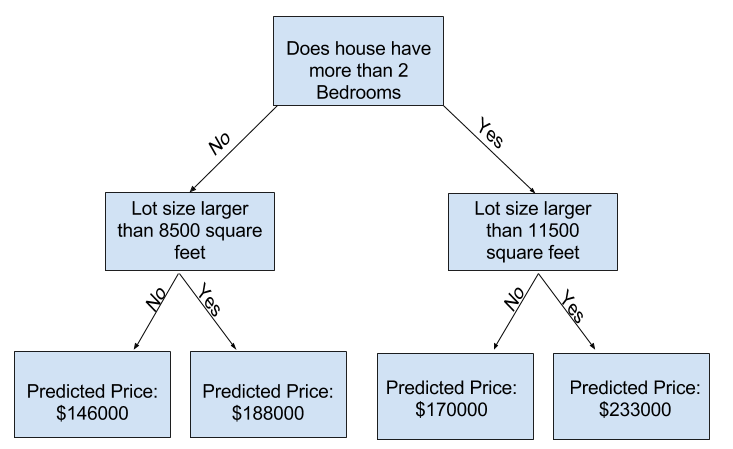

In der Praxis ist es nicht ungewöhnlich, dass ein Baum zwischen der obersten Ebene (alle Häuser) und einem Blatt zehn Aufteilungen aufweist. Je tiefer der Baum, desto weniger Häuser enthält der Datensatz. Hätte ein Baum nur eine Aufteilung, würden die Daten in zwei Gruppen unterteilt. Würde jede Gruppe erneut aufgeteilt, ergäben sich vier Häusergruppen. Würde jede dieser Gruppen erneut aufgeteilt, entstünden acht Gruppen. Verdoppeln wir die Anzahl der Gruppen durch weitere Aufteilungen auf jeder Ebene, erhalten wir bis zur zehnten Ebene zwei Häusergruppen. Das entspricht 1024 Blättern.

Wenn wir die Häuser auf viele Blätter aufteilen, enthält jedes Blatt auch weniger Häuser. Blätter mit sehr wenigen Häusern liefern zwar Vorhersagen, die den tatsächlichen Werten dieser Häuser recht nahe kommen, können aber für neue Daten sehr unzuverlässige Vorhersagen liefern (da jede Vorhersage nur auf wenigen Häusern basiert).

Dieses Phänomen wird als Überanpassung bezeichnet. Dabei passt ein Modell nahezu perfekt zu den Trainingsdaten, schneidet aber bei der Validierung und anderen neuen Daten schlecht ab. Umgekehrt: Wenn wir unseren Baum sehr flach gestalten, unterteilt er die Häuser nicht in klar unterscheidbare Gruppen.

Im Extremfall: Selbst wenn ein Baum die Häuser nur in zwei oder vier unterteilt, weist jede Gruppe immer noch eine große Vielfalt an Häusern auf. Die resultierenden Vorhersagen können für die meisten Häuser selbst in den Trainingsdaten weit danebenliegen (und aus demselben Grund auch bei der Validierung schlecht sein). Wenn ein Modell wichtige Unterscheidungsmerkmale und Muster in den Daten nicht erfasst und daher selbst in den Trainingsdaten schlecht abschneidet, spricht man von Unteranpassung.

Da uns die Genauigkeit neuer Daten, die wir anhand unserer Validierungsdaten schätzen, wichtig ist, wollen wir den optimalen Punkt zwischen Unter- und Überanpassung finden. Visuell betrachtet, suchen wir den Tiefpunkt der (roten) Validierungskurve in der folgenden Abbildung.


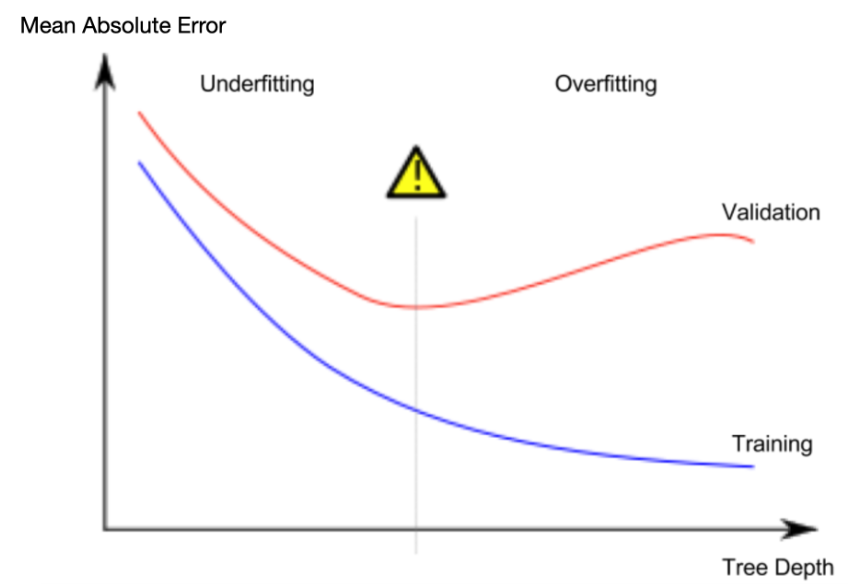

## Beispiel
Es gibt einige Alternativen zur Steuerung der Baumtiefe. Viele ermöglichen, dass einige Routen durch den Baum tiefer sind als andere. Das Argument max_leaf_nodes bietet jedoch eine sehr sinnvolle Möglichkeit, Über- und Unteranpassung zu kontrollieren. Je mehr Blätter das Modell erstellen darf, desto weiter bewegen wir uns vom Unteranpassungsbereich im obigen Diagramm zum Überanpassungsbereich.

Mit einer Nutzenfunktion können wir MAE-Werte verschiedener Werte für max_leaf_nodes vergleichen:

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)
#The data is loaded into train_X, val_X, train_y and val_y using the code you've already seen (and which you've already written).

In [40]:
#We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  75314
Max leaf nodes: 50  		 Mean Absolute Error:  54065
Max leaf nodes: 500  		 Mean Absolute Error:  43210
Max leaf nodes: 5000  		 Mean Absolute Error:  43895


Von den aufgeführten Optionen ist 500 die optimale Anzahl an Blättern..

## Fazit
Die Quintessenz: Modelle können unter folgenden Problemen leiden:

Überanpassung: Sie erfassen fehlerhafte Muster, die sich in Zukunft nicht wiederholen, was zu ungenaueren Vorhersagen führt, oder
Unteranpassung: Sie erfassen relevante Muster nicht, was wiederum zu ungenaueren Vorhersagen führt.
Wir verwenden Validierungsdaten, die nicht im Modelltraining verwendet werden, um die Genauigkeit eines Kandidatenmodells zu messen. So können wir viele Kandidatenmodelle testen und das beste behalten.

## Introduction¶
Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf.
1,088 / 5,000
Einleitung¶
Entscheidungsbäume stellen Sie vor eine schwierige Entscheidung. Ein tiefer Baum mit vielen Blättern führt zu Überanpassung, da jede Vorhersage nur auf historischen Daten der wenigen Häuser an seinem Blatt basiert. Ein flacher Baum mit wenigen Blättern hingegen liefert eine schlechte Performance, da er nicht so viele Unterschiede in den Rohdaten erfasst.

Selbst die modernsten Modellierungstechniken stehen vor diesem Spannungsfeld zwischen Unter- und Überanpassung. Viele Modelle bieten jedoch clevere Ideen, die zu einer besseren Performance führen können. Wir betrachten den Random Forest als Beispiel.

Der Random Forest verwendet viele Bäume und trifft seine Vorhersage durch Mittelung der Vorhersagen der einzelnen Komponentenbäume. Er hat im Allgemeinen eine deutlich höhere Vorhersagegenauigkeit als ein einzelner Entscheidungsbaum und funktioniert gut mit Standardparametern. Durch kontinuierliche Modellierung können Sie weitere Modelle mit noch besserer Performance erlernen. Viele dieser Modelle sind jedoch empfindlich gegenüber der Wahl der richtigen Parameter.

Beispiel
Sie haben den Code zum Laden der Daten bereits einige Male gesehen. Am Ende des Ladevorgangs haben wir die folgenden Variablen:

- train_X
- val_X
- train_y
- val_y

In [41]:
import pandas as pd
    
# Load data
california_file_path = 'cali_data.csv'
california_data = pd.read_csv(california_file_path) 
# Filter rows with missing values
california_data = california_data.dropna(axis=0)
# Choose target and features
y = california_data.median_house_value
california_features = ['total_rooms', 'total_bedrooms', 'housing_median_age', 'latitude', 'longitude']
X = california_data[california_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

Wir erstellen ein Random-Forest-Modell auf ähnliche Weise wie wir einen Entscheidungsbaum in scikit-learn erstellt haben – dieses Mal verwenden wir die Klasse RandomForestRegressor anstelle von DecisionTreeRegressor.

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
cali_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, cali_preds))

33901.28457232335


## Fazit
Es besteht wahrscheinlich noch Verbesserungspotenzial, aber dies ist eine deutliche Verbesserung gegenüber dem besten Entscheidungsbaumfehler von 250.000. Es gibt Parameter, mit denen Sie die Leistung des Random Forests ähnlich anpassen können, wie wir die maximale Tiefe des einzelnen Entscheidungsbaums geändert haben. Eine der besten Eigenschaften von Random-Forest-Modellen ist jedoch, dass sie im Allgemeinen auch ohne diese Optimierung gut funktionieren.